# **Assignment 10**
Diana Plunkett

(Just the iris questions)

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [2]:
# Load dataset here once and assign to variables iris

iris = ds.load_iris()
X = iris.data
y = iris.target
df_iris = pd.DataFrame(X, columns=iris.feature_names) 


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [5]:
kn = KNN(n_neighbors=5) 
kn.fit(X, y)

X_new =np.array([[.8,.8,.8,8],
                [.8,.8,.6,8],
                [.2, .4, .8, 0.8]])


pred=kn.predict(X_new)
print('Predictions: {}'.format(iris.target_names[pred]))

Predictions: ['versicolor' 'versicolor' 'setosa']


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [6]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.20,
                                       random_state=88,
                                       stratify=y) 

knn_results=[]

neighbors = np.arange(1, 26)
for neighbor in neighbors:    
    knn = KNN(n_neighbors=neighbor)    
    knn.fit(X_train, y_train)    
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    knn_results.append((neighbor, train_score, test_score))

print(pd.DataFrame(knn_results, 
                   columns=['K', 
                            'Train Score', 
                            'Test Score']
                   ).to_string(index=False))


 K  Train Score  Test Score
 1     1.000000    0.966667
 2     0.983333    0.966667
 3     0.958333    0.966667
 4     0.950000    0.966667
 5     0.966667    0.966667
 6     0.966667    0.966667
 7     0.966667    0.966667
 8     0.975000    0.966667
 9     0.966667    0.966667
10     0.975000    0.966667
11     0.975000    0.966667
12     0.983333    0.933333
13     0.975000    0.966667
14     0.975000    0.966667
15     0.975000    0.966667
16     0.975000    0.966667
17     0.975000    0.966667
18     0.983333    0.966667
19     0.975000    0.966667
20     0.966667    0.933333
21     0.975000    0.966667
22     0.958333    0.933333
23     0.975000    0.933333
24     0.950000    0.933333
25     0.958333    0.933333


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

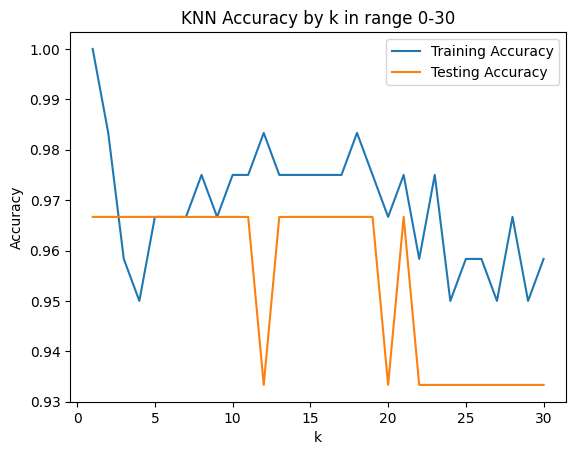

In [7]:

X_train1, X_test1, y_train1, y_test1 = tts(X, y, 
                                       test_size=0.20,
                                       random_state=123)


train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1, 31)
for neighbor in neighbors:    
    knn = KNN(n_neighbors=neighbor)    
    knn.fit(X_train, y_train)    
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.title("KNN Accuracy by k in range 0-30")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()